Introduction To Business Analytics

Final Project

Submitted by:
 - Hiral Shah - 101539997
 - Rajesh Adep - 101540051
 - Shakshi Maheshwari - 101539638 
 - Manushka Mhatre - 101543219

# Necessary Libraries and Dataset 

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#Read the dataset
data = pd.read_csv('insurance.csv')

#Print sample data
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
#Shape of the data(rows,columns)
data.shape

(1338, 7)

# Exploratory Data Analysis (EDA)

Duplicates

In [4]:
#Check duplicates
duplicates = data.duplicated().sum()
print(f"Number of duplicate records: {duplicates}")

#Drop duplicates if any
data = data.drop_duplicates()

Number of duplicate records: 1


In [5]:
#Shape of the data after dropping duplicates
data.shape

(1337, 7)

Summary Statistics

In [6]:
#Summary statistics for potential outliers
print(data.describe())

               age          bmi     children       charges
count  1337.000000  1337.000000  1337.000000   1337.000000
mean     39.222139    30.663452     1.095737  13279.121487
std      14.044333     6.100468     1.205571  12110.359656
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.290000     0.000000   4746.344000
50%      39.000000    30.400000     1.000000   9386.161300
75%      51.000000    34.700000     2.000000  16657.717450
max      64.000000    53.130000     5.000000  63770.428010


Missing Values

In [7]:
#Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Outliers

In [8]:
#Function to find which numerical columns have outliers
def find_outliers_iqr(df):
    outlier_columns = []
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        #Identify if there are any outliers
        outlier_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
        if df[outlier_mask].shape[0] > 0:
            outlier_columns.append(column)
    return outlier_columns

#Find columns
outlier_columns = find_outliers_iqr(data)
print("Columns with outliers:", outlier_columns)

Columns with outliers: ['bmi', 'charges']


In [9]:
#Detecting Outliers using IQR for 'bmi' and 'charges'
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

#Outliers in 'bmi'
bmi_outliers = detect_outliers(data, 'bmi')
print(f"Number of outliers in 'bmi': {len(bmi_outliers)}")

#Outliers in 'charges'
charges_outliers = detect_outliers(data, 'charges')
print(f"Number of outliers in 'charges': {len(charges_outliers)}")

Number of outliers in 'bmi': 9
Number of outliers in 'charges': 139


In [10]:
#Function to cap outliers at 1st and 99th percentiles
def cap_outliers(df, column):
    lower_cap = df[column].quantile(0.01)
    upper_cap = df[column].quantile(0.99)
    df[column] = df[column].apply(lambda x: upper_cap if x > upper_cap else lower_cap if x < lower_cap else x)
    return df

#Cap outliers for 'bmi'
data = cap_outliers(data, 'bmi')

#Cap outliers for 'charges'
data = cap_outliers(data, 'charges')

data.shape

(1337, 7)

Encode the smoker column - categorical column

In [11]:
#Encoding 'smoker' column: 'yes' -> 1, 'no' -> 0
data['smoker'] = data['smoker'].apply(lambda x: 1 if x == 'yes' else 0)

#Check the transformation
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


# Data Visualization

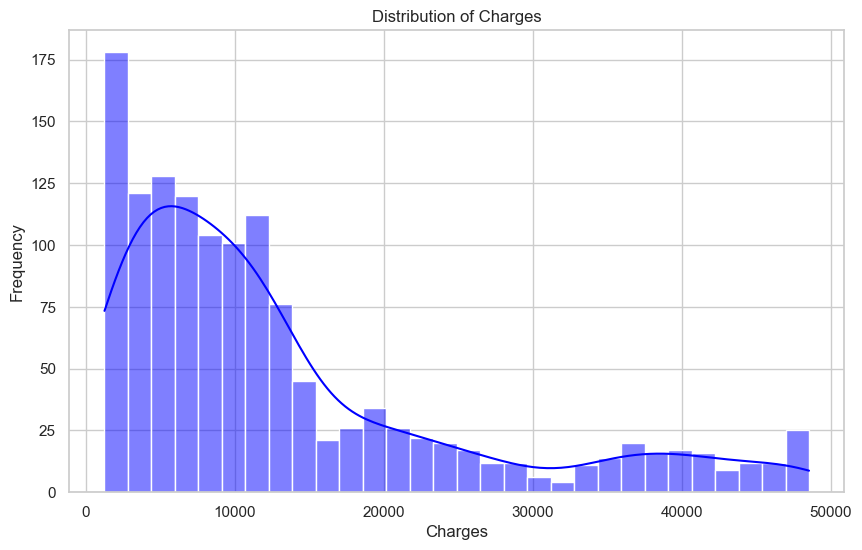

In [12]:
#Set style for plot
sns.set(style="whitegrid")

#Distribution of Charges
plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], bins=30, kde=True, color='blue')
plt.title('Distribution of Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

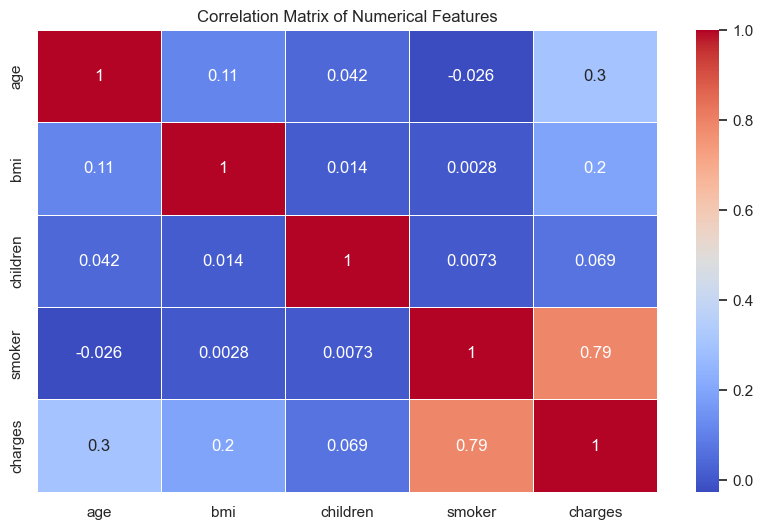

In [13]:
#Set style for plot
sns.set(style="whitegrid")

#Correlation Matrix
plt.figure(figsize=(10, 6))
corr_matrix = data[['age', 'bmi', 'children', 'smoker','charges']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

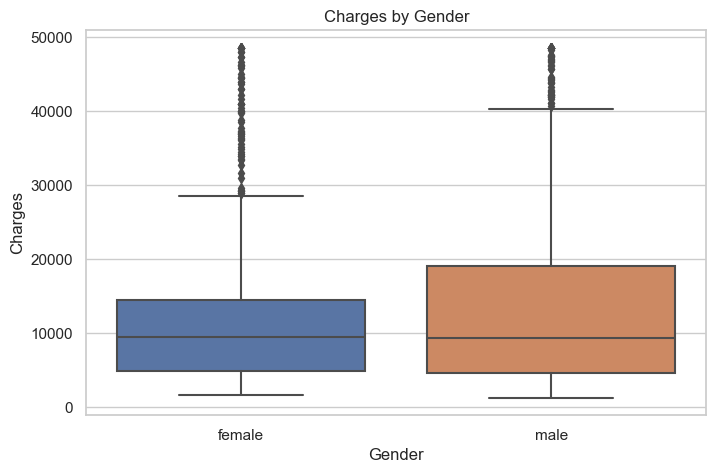

In [14]:
#Set style for plot
sns.set(style="whitegrid")

#Charges by Gender
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='charges', data=data)
plt.title('Charges by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.show()

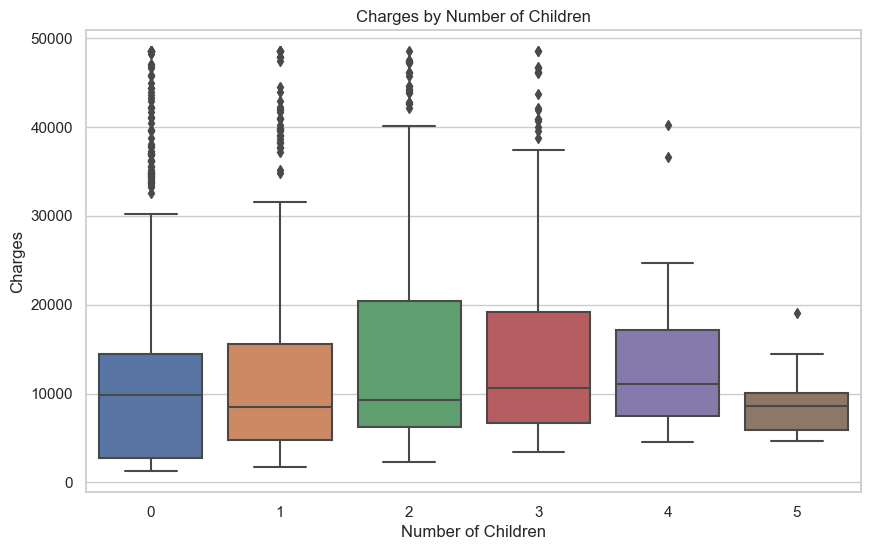

In [15]:
#Set style for plot
sns.set(style="whitegrid")

#Charges vs Number of Children
plt.figure(figsize=(10, 6))
sns.boxplot(x='children', y='charges', data=data)
plt.title('Charges by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Charges')
plt.show()

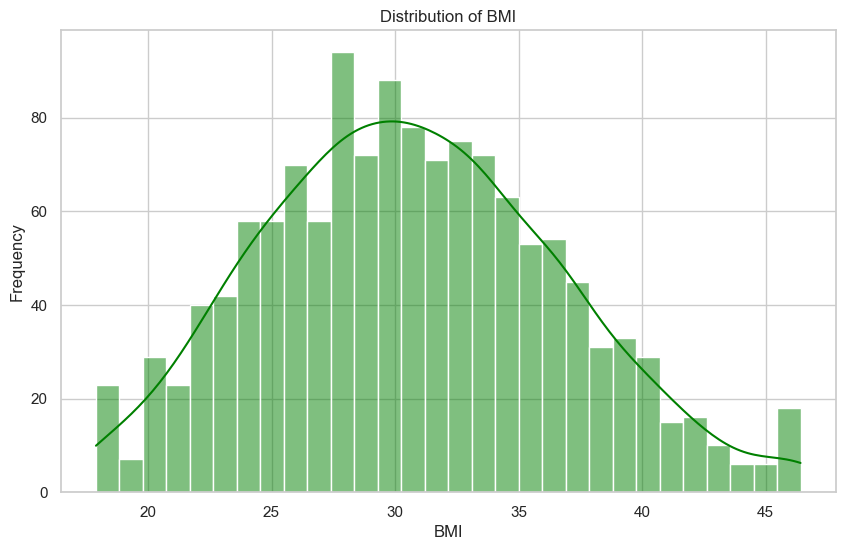

In [16]:
#Set style for plot
sns.set(style="whitegrid")

#Distribution of BMI
plt.figure(figsize=(10, 6))
sns.histplot(data['bmi'], bins=30, kde=True, color='green')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

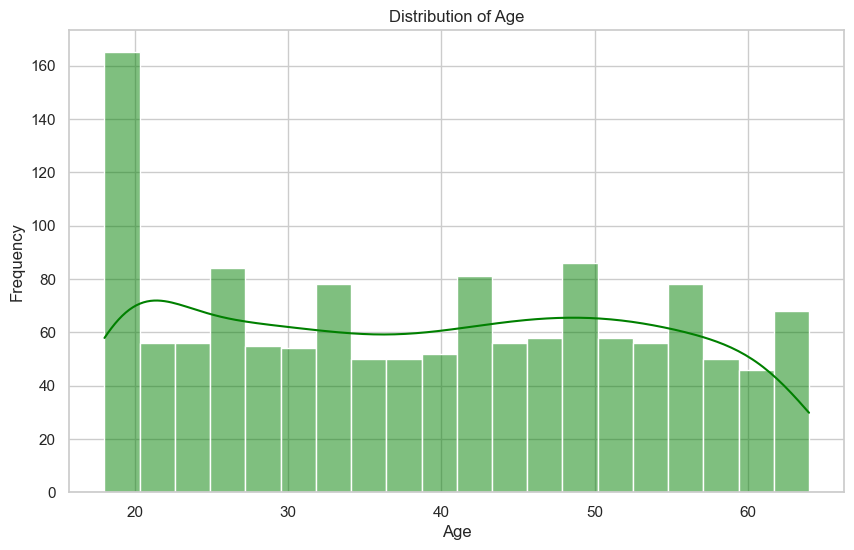

In [17]:
#Set style for plot
sns.set(style="whitegrid")

#Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=20, kde=True, color='green')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

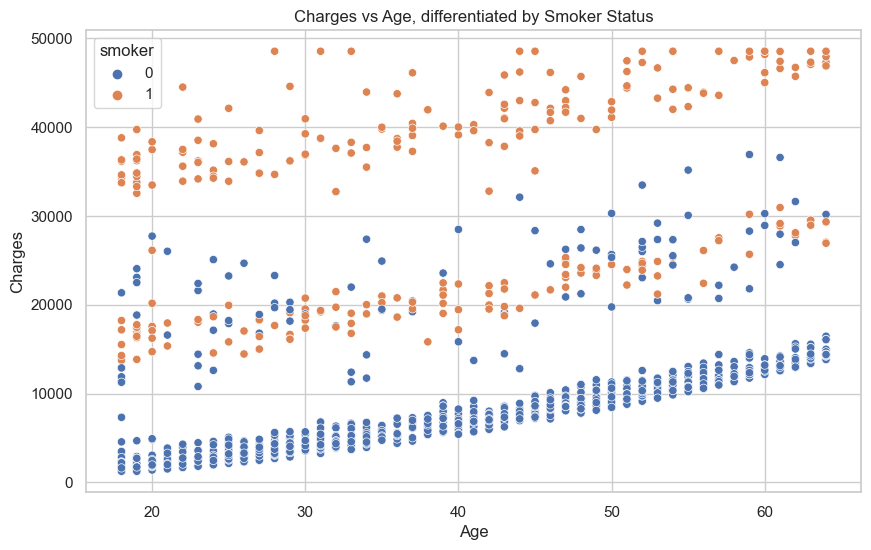

In [18]:
#Set style for plot
sns.set(style="whitegrid")

#Charges vs Age, differentiated by Smoker status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=data)
plt.title('Charges vs Age, differentiated by Smoker Status')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

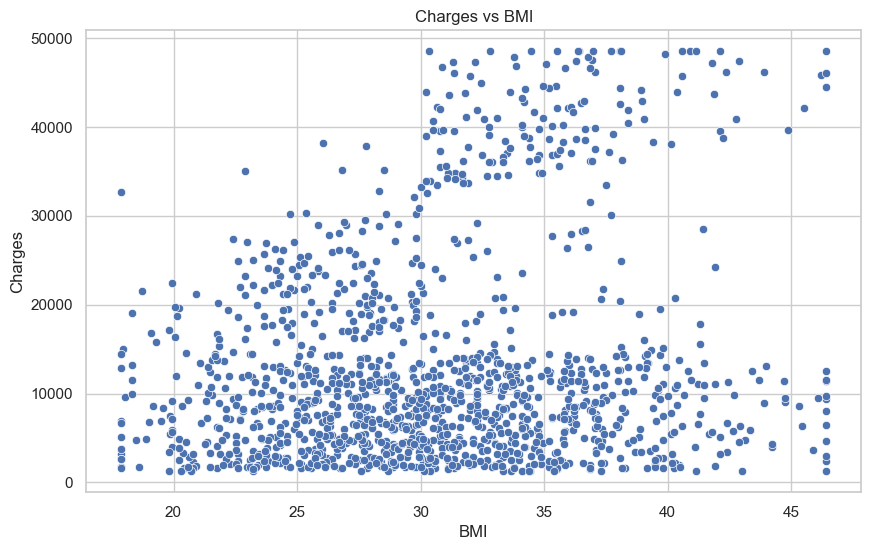

In [19]:
#Set style for plot
sns.set(style="whitegrid")

#Charges vs BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=data)
plt.title('Charges vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

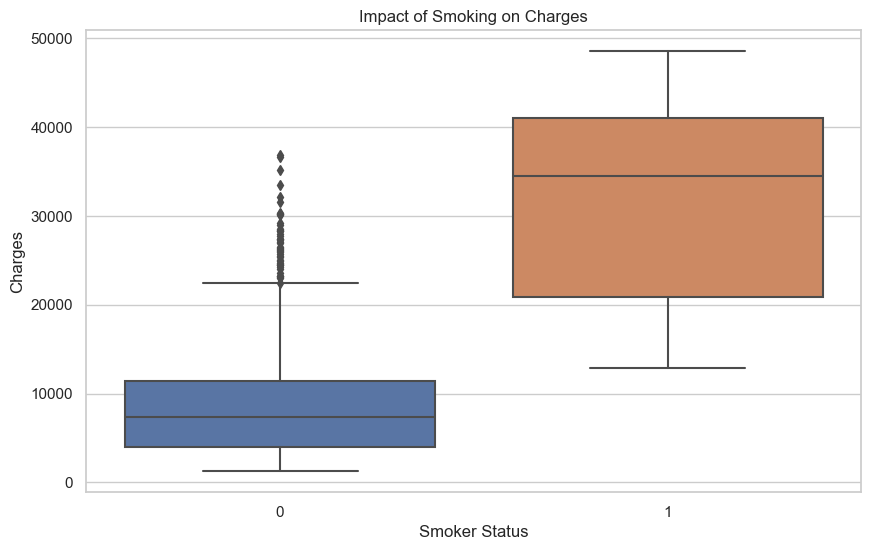

In [20]:
#Set style for plot
sns.set(style="whitegrid")

#Impact of Smoking on Charges
plt.figure(figsize=(10, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Impact of Smoking on Charges')
plt.xlabel('Smoker Status')
plt.ylabel('Charges')
plt.show()

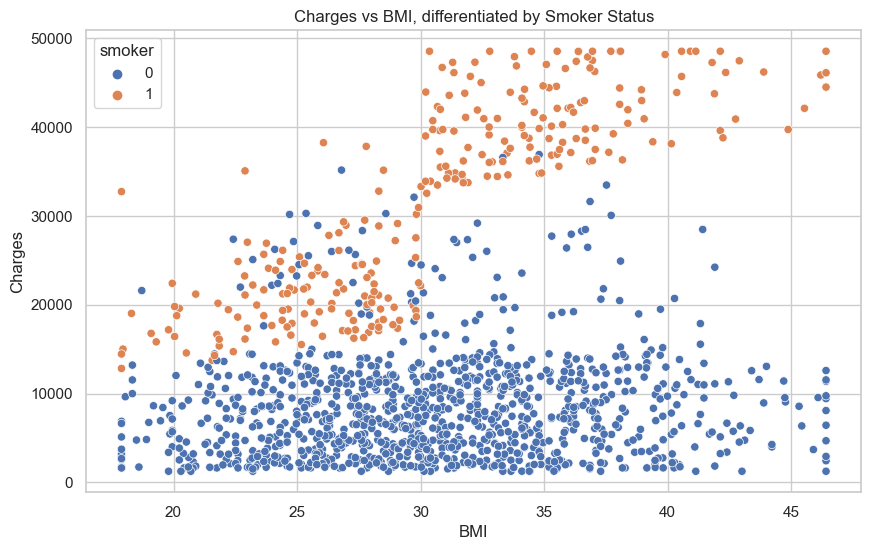

In [21]:
#Set style for plot
sns.set(style="whitegrid")

#BMI vs Charges, differentiated by Smoker status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=data)
plt.title('Charges vs BMI, differentiated by Smoker Status')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

# Linear Regression

Modeling

In [22]:
#Selecting the features (age, bmi, smoker) and target variable (charges)
X = data[['age', 'bmi', 'smoker']]
y = data['charges']

In [23]:
#Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
#Build the linear regression model
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [25]:
#Predict on the test set
y_pred = mlr_model.predict(X_test)

In [26]:
#Output model coefficients
print("Coefficients:", mlr_model.coef_)
print("Intercept:", mlr_model.intercept_)

Coefficients: [  251.25291594   307.550037   22941.7278966 ]
Intercept: -10825.658774827712


Model Evaluation

In [27]:
#Evaluate the model using r-squared 
r_squared = r2_score(y_test, y_pred)
print(f"R-squared value: {r_squared}")

R-squared value: 0.8191380921263752


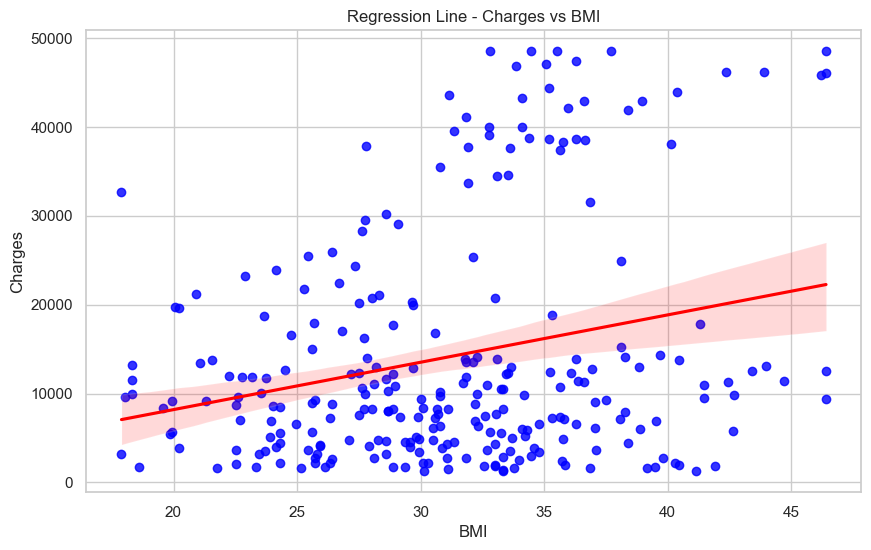

In [28]:
#Visualizing the relationship between 'bmi' and 'charges' with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test['bmi'], y=y_test, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Regression Line - Charges vs BMI')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

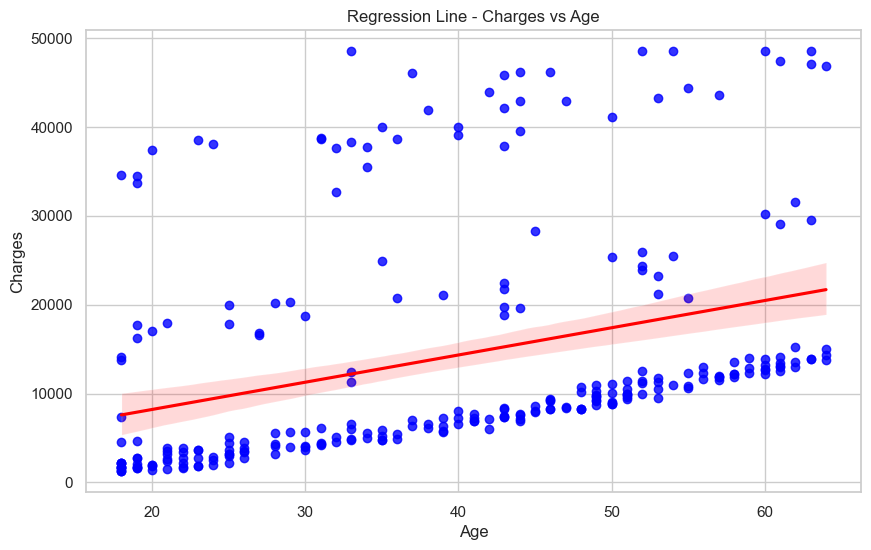

In [29]:
#Visualizing the relationship between 'bmi' and 'charges' with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=X_test['age'], y=y_test, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('Regression Line - Charges vs Age')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

Visualize Predictions

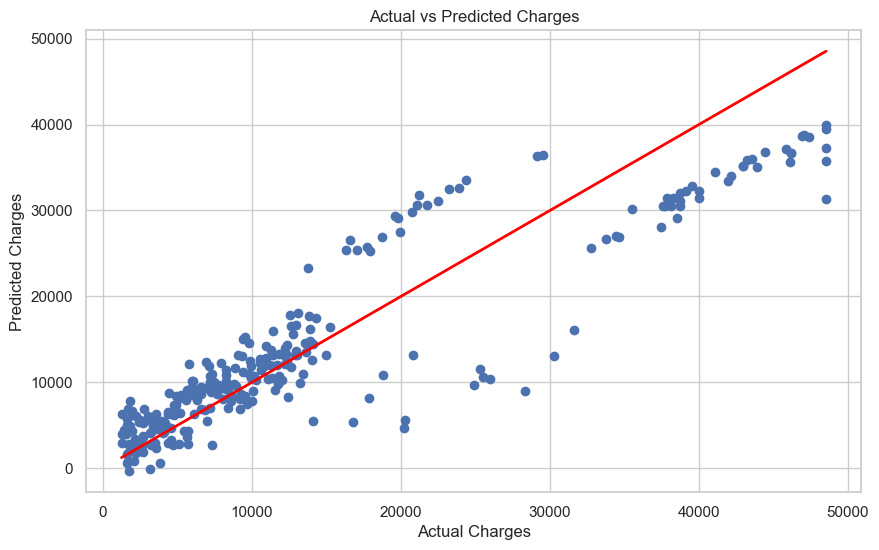

In [30]:
#Scatter plot: Actual vs Predicted charges
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

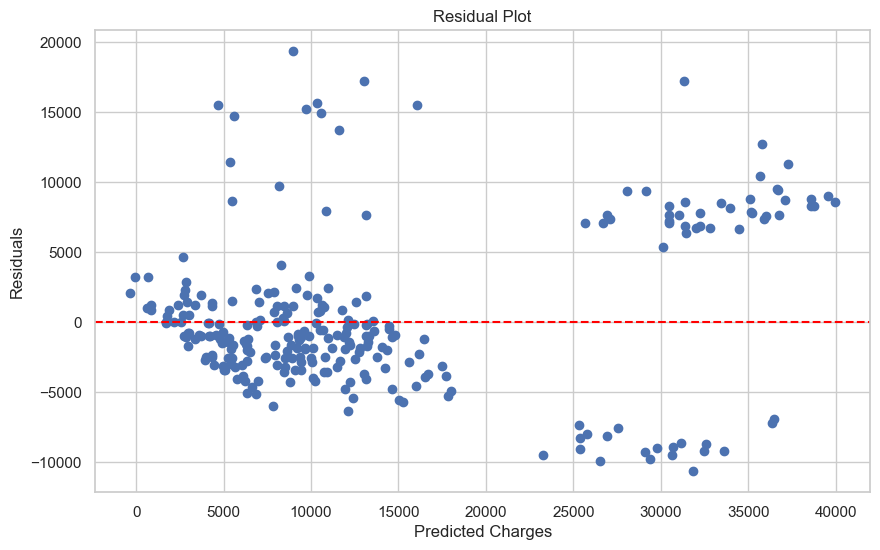

In [31]:
#Residual Plot
plt.figure(figsize=(10, 6))
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.show()